In [6]:
#### Data Analysis - 
# Version 2
## 1/26/25
## 18:45

In [7]:
# Importing Modules

# Importing Sys
import sys

# Importing OS
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

# Now you can use absolute imports
from d497_helpers import folder_manager as fm, archive_module, checkpoint_helper as CheckPoint, database_helper as db_tool, config, import_dataframe

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Seaborn
import seaborn as sns

# Itertools
import itertools

# MatplotLib 
import matplotlib.pyplot as plt

# Data Analysis: 

## Is there any correlation between UFO Sightings and U.S. Births? 

In [8]:
# Importing cvs and pickle using my new import dataframe tool
import_cdc_data_main_csv, import_cdc_data_main_pickle = import_dataframe.import_dataframe("cdc_data", "cleaned", "cdc_data_main_df")

In [9]:
# Keeping pickle
cdc_data_main_df = import_cdc_data_main_pickle.copy()

In [10]:
# Cleanup
del import_cdc_data_main_csv
del import_cdc_data_main_pickle

In [11]:
# getting info
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  object
 1   month_code      187620 non-null  object
 2   state_fipcode   187620 non-null  object
 3   county_fipcode  187620 non-null  object
 4   fips_five       187620 non-null  object
 5   births          187620 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 8.6+ MB


In [12]:
# Visual inspection
cdc_data_main_df.head()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births
0,1995,1,01,C015,01015,464
1,1995,1,01,C073,01073,1119
2,1995,1,01,C089,01089,658
3,1995,1,01,C097,01097,845
4,1995,1,01,C101,01101,630


In [13]:
# Initializes Database Engine and Session For SQL
db_tool.initialize_engine()
db_tool.initialize_session()

In [14]:
# sql query to get aggregated ufo data from the ufo_data_agg table in the database

pull_ufo_agg_data_sql_query = '''

    SELECT
        *
        FROM
            ufo_data_agg

'''

In [15]:
# Exporting sql table data to dataframe
ufo_data_agg_df = db_tool.export_df_from_sql(pull_ufo_agg_data_sql_query, "ufo_data_agg")

2025-01-26 18:47:26,004 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-26 18:47:26,006 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-01-26 18:47:26,007 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-26 18:47:26,009 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("

    SELECT
        *
        FROM
            ufo_data_agg

")
2025-01-26 18:47:26,010 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-26 18:47:26,011 INFO sqlalchemy.engine.Engine 

    SELECT
        *
        FROM
            ufo_data_agg


2025-01-26 18:47:26,012 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-01-26 18:47:26,255 INFO sqlalchemy.engine.Engine COMMIT


In [16]:
# getting info
ufo_data_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83730 entries, 0 to 83729
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       83730 non-null  int64 
 1   month_code      83730 non-null  int64 
 2   state_fipcode   83730 non-null  object
 3   county_fipcode  83730 non-null  object
 4   fips_five       83730 non-null  object
 5   sightings       83730 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ MB


In [17]:
# visual Inspection
ufo_data_agg_df.head()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings
0,1994,1,06,C037,06037,4
1,1994,1,06,C053,06053,1
2,1994,1,06,C089,06089,1
3,1994,1,06,C111,06111,1
4,1994,1,08,C117,08117,1


In [18]:
# Converting year code and month code data in the cdc dataframe to int type
cdc_data_main_df['year_code'] = cdc_data_main_df['year_code'].astype(int)
cdc_data_main_df['month_code'] = cdc_data_main_df['month_code'].astype(int)

In [19]:
# getting info
cdc_data_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187620 entries, 0 to 187619
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year_code       187620 non-null  int64 
 1   month_code      187620 non-null  int64 
 2   state_fipcode   187620 non-null  object
 3   county_fipcode  187620 non-null  object
 4   fips_five       187620 non-null  object
 5   births          187620 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 8.6+ MB


In [20]:
# merging ufo aggregated data with cdc data
merged_df = cdc_data_main_df.merge(ufo_data_agg_df, on=['year_code', 'month_code', 'state_fipcode', 'county_fipcode', 'fips_five'], how="inner")

In [21]:
# getting info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48015 entries, 0 to 48014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_code       48015 non-null  int64 
 1   month_code      48015 non-null  int64 
 2   state_fipcode   48015 non-null  object
 3   county_fipcode  48015 non-null  object
 4   fips_five       48015 non-null  object
 5   births          48015 non-null  int64 
 6   sightings       48015 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [22]:
# Visual inspection
merged_df.sample(10)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births,sightings
43813,2021,8,18,C097,18097,1393,1
13571,2007,9,06,C075,06075,784,1
6962,2003,4,37,C025,37025,325,1
39543,2019,9,12,C086,12086,2690,1
37222,2018,6,17,C163,17163,359,1
41029,2020,3,40,C143,40143,1060,1
1305,1997,7,36,C111,36111,237,1
45670,2022,9,06,C111,06111,795,1
3850,2000,7,36,C087,36087,462,1
28852,2014,8,36,C111,36111,196,1


In [23]:
# Generating correlation results of the merged datat's birth and sightings values
correlation = merged_df[['births', 'sightings']].corr()

In [24]:
# Print correclation
print(correlation)

             births  sightings
births     1.000000   0.439387
sightings  0.439387   1.000000


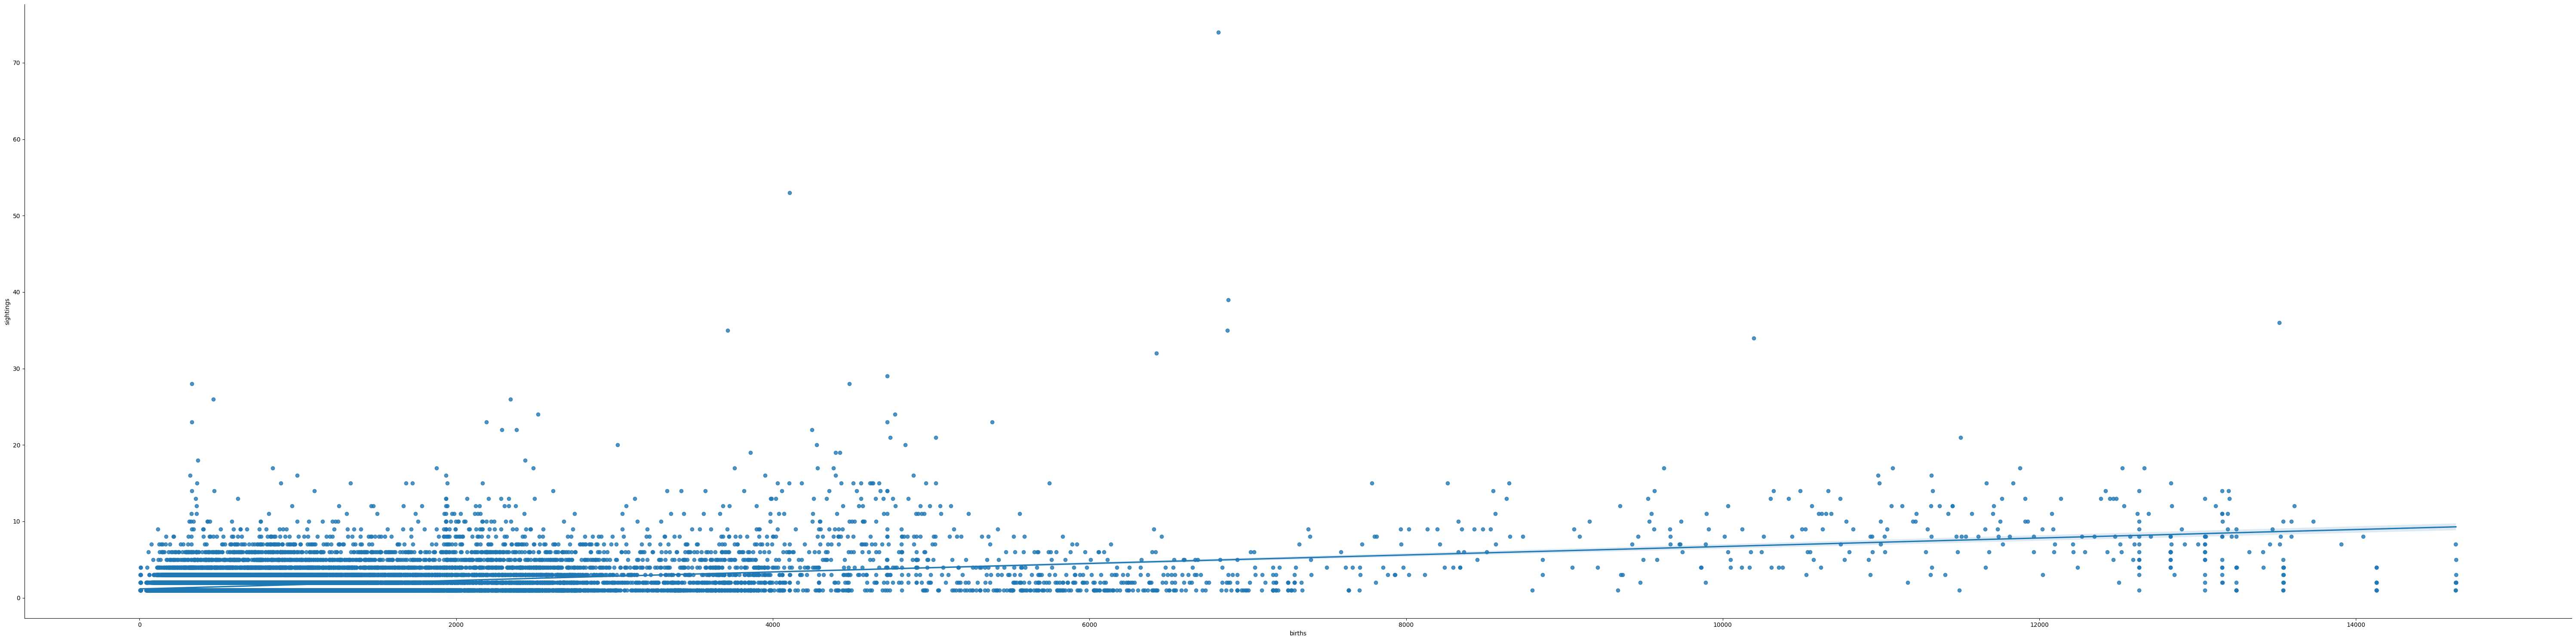

In [25]:
# Plot correlation
sns.lmplot(data=merged_df, x='births', y='sightings', height=15, aspect=4)

What we are able to see here is there that there is a very slight positive correlation between the number of births and UFO sightings over the dataset.

Let's try seeing if we can identify further correlations between pairs in the dataset's variables. We will do this by swithching to the Spearman correlation method. 

In [26]:
# Creating a new subset datframe from the merged dataframe wihtout the county_fipcode column for this next correlation method. 
merged_df_subset = merged_df.drop(columns=['county_fipcode'])

In [27]:
# Performing spearman correlation on the new subset dataframe
spearman_correlation = merged_df_subset.corr(method='spearman')

In [28]:
# printing correclation results 
spearman_correlation

,year_code,month_code,state_fipcode,fips_five,births,sightings
year_code,1.000000,-0.025134,0.018880,0.019084,-0.147698,0.055536
month_code,-0.025134,1.000000,0.014449,0.014216,0.004247,0.041708
state_fipcode,0.018880,0.014449,1.000000,0.998409,-0.076542,-0.099840
fips_five,0.019084,0.014216,0.998409,1.000000,-0.079435,-0.102069
births,-0.147698,0.004247,-0.076542,-0.079435,1.000000,0.287892
sightings,0.055536,0.041708,-0.099840,-0.102069,0.287892,1.000000


### Make a combination dataframe for all possible dates and states. 

In [29]:
get_fips_data_sql_query = """

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data
            WHERE multi_county_flag == "0"
"""

In [30]:
fips_results = db_tool.execute_query(get_fips_data_sql_query)

2025-01-26 18:47:29,943 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-01-26 18:47:29,944 INFO sqlalchemy.engine.Engine 

    SELECT 
        state_fipcode,
        county_fipcode,
        fips_five
    FROM
        fips_data
            WHERE multi_county_flag == "0"

2025-01-26 18:47:29,945 INFO sqlalchemy.engine.Engine [generated in 0.00081s] ()
2025-01-26 18:47:30,096 INFO sqlalchemy.engine.Engine COMMIT


In [31]:
fips_data = pd.DataFrame.from_records(fips_results)

In [32]:
fips_data.columns = ['state_fipcode', 'county_fipcode', 'fips_five']

In [33]:
fips_data.sample()

,state_fipcode,county_fipcode,fips_five
2780,06,C033,06033


In [34]:
fips_five_list = fips_data['fips_five'].unique()

In [35]:
fips_five_list

array(['01001', '01003', '01005', ..., '56041', '56043', '56045'],
      shape=(3139,), dtype=object)

In [36]:
# Define the range of years and months
years = list(range(1995, 2024)) # 1994 to 2023 inclusive
months = list(range(1, 13))      # 1 to 12 inclusive

In [37]:
all_combinations = pd.DataFrame(
    itertools.product(years, months, fips_five_list),
    columns=['year_code', 'month_code', 'fips_five']
)


In [38]:
all_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   year_code   1092372 non-null  int64 
 1   month_code  1092372 non-null  int64 
 2   fips_five   1092372 non-null  object
dtypes: int64(2), object(1)
memory usage: 25.0+ MB


In [39]:
all_combinations.head(25)

,year_code,month_code,fips_five
0,1995,1,01001
1,1995,1,01003
2,1995,1,01005
3,1995,1,01007
4,1995,1,01009
5,1995,1,01011
6,1995,1,01013
7,1995,1,01015
8,1995,1,01017
9,1995,1,01019


In [40]:
all_combinations['state_fipcode'] = all_combinations['fips_five'].str.slice(0,2)
all_combinations['county_fipcode'] = "C" + all_combinations['fips_five'].str.slice(-3)

In [41]:
all_combinations.insert(4, 'fips_five', all_combinations.pop('fips_five'))

In [42]:
time_series_ufo_df = all_combinations.merge(ufo_data_agg_df, on=['year_code','month_code', 'state_fipcode','county_fipcode','fips_five'], how="left", indicator=True)

In [43]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   sightings       76770 non-null    float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [44]:
time_series_ufo_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings,_merge
746942,2014,10,54,C021,54021,NaN,left_only
801975,2016,4,29,C107,29107,NaN,left_only
804852,2016,5,26,C085,26085,NaN,left_only
911144,2019,3,19,C097,19097,NaN,left_only
886406,2018,7,24,C041,24041,NaN,left_only
742173,2014,9,27,C121,27121,NaN,left_only
522129,2008,11,21,C131,21131,NaN,left_only
724125,2014,3,40,C055,40055,NaN,left_only
824656,2016,11,41,C067,41067,2.0,both
503060,2008,5,19,C069,19069,NaN,left_only


In [45]:
time_series_ufo_df['sightings'] = time_series_ufo_df['sightings'].fillna(0)

In [46]:
time_series_ufo_df.sample()

,year_code,month_code,state_fipcode,county_fipcode,fips_five,sightings,_merge
1019702,2022,1,48,C293,48293,0.0,left_only


In [47]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   sightings       1092372 non-null  float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [48]:
time_series_ufo_df = time_series_ufo_df.drop(columns=['_merge'])

In [49]:
time_series_ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   year_code       1092372 non-null  int64  
 1   month_code      1092372 non-null  int64  
 2   state_fipcode   1092372 non-null  object 
 3   county_fipcode  1092372 non-null  object 
 4   fips_five       1092372 non-null  object 
 5   sightings       1092372 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 50.0+ MB


In [50]:
time_series_births_df = all_combinations.merge(cdc_data_main_df, on=['year_code', 'month_code','state_fipcode','county_fipcode','fips_five'], how='left', indicator=True)

In [51]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   births          186924 non-null   float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [52]:
time_series_births_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births,_merge
500881,2008,4,34,C019,34019,92.0,both
499753,2008,4,17,C123,17123,NaN,left_only
334526,2003,11,35,C001,35001,916.0,both
895532,2018,10,20,C065,20065,NaN,left_only
344441,2004,2,42,C099,42099,NaN,left_only
658661,2012,6,48,C181,48181,250.0,both
190953,2000,1,48,C187,48187,NaN,left_only
330442,2003,10,19,C123,19123,NaN,left_only
727671,2014,4,48,C085,48085,1021.0,both
733165,2014,6,34,C015,34015,257.0,both


In [53]:
time_series_births_df['births'] = time_series_births_df['births'].fillna(0)

In [54]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   year_code       1092372 non-null  int64   
 1   month_code      1092372 non-null  int64   
 2   state_fipcode   1092372 non-null  object  
 3   county_fipcode  1092372 non-null  object  
 4   fips_five       1092372 non-null  object  
 5   births          1092372 non-null  float64 
 6   _merge          1092372 non-null  category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 51.0+ MB


In [55]:
time_series_births_df = time_series_births_df.drop(columns='_merge')

In [56]:
time_series_births_df['births'] = time_series_births_df['births'].astype(int)

In [57]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   year_code       1092372 non-null  int64 
 1   month_code      1092372 non-null  int64 
 2   state_fipcode   1092372 non-null  object
 3   county_fipcode  1092372 non-null  object
 4   fips_five       1092372 non-null  object
 5   births          1092372 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 50.0+ MB


In [58]:
time_series_births_df.sample(15)

,year_code,month_code,state_fipcode,county_fipcode,fips_five,births
624772,2011,8,05,C005,05005,0
507415,2008,6,38,C099,38099,0
712967,2013,12,13,C063,13063,527
4407,1995,2,26,C085,26085,0
843550,2017,5,42,C115,42115,0
968930,2020,9,39,C157,39157,0
550950,2009,8,30,C065,30065,0
848097,2017,7,16,C039,16039,0
594835,2010,10,29,C175,29175,0
417809,2006,2,12,C011,12011,1869


In [59]:
# This process is super slow due to the row by row application. 
# Need to adjust this to a different method. 

time_series_births_df['date'] = time_series_births_df.apply(lambda row: pd.to_datetime(f"{row.year_code}-{row.month_code}-01"), axis=1)

In [60]:
time_series_births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092372 entries, 0 to 1092371
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   year_code       1092372 non-null  int64         
 1   month_code      1092372 non-null  int64         
 2   state_fipcode   1092372 non-null  object        
 3   county_fipcode  1092372 non-null  object        
 4   fips_five       1092372 non-null  object        
 5   births          1092372 non-null  int64         
 6   date            1092372 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 58.3+ MB


In [ ]:
time_series_births_agg_df.sample(15)

In [ ]:
time_series_births_df.plot.scatter(figsize=(10, 20), x='date', y='births', )

In [ ]:
# This process is super slow due to the row by row application. 
# Need to adjust this to a different method. 

time_series_ufo_df['date'] = time_series_ufo_df.apply(lambda row: pd.to_datetime(f"{row.year_code}-{row.month_code}-01"), axis=1)

In [ ]:
# Define a dictionary for state FIPS codes and regions
regions = {
    'Northeast': ['09', '23', '25', '33', '44', '50', '34', '36', '42'],
    'Midwest': ['18', '17', '26', '39', '55', '19', '20', '27', '29', '31', '38', '46'],
    'South': ['10', '11', '12', '13', '21', '24', '37', '45', '51', '54', '01', '05', '22', '28', '40', '47', '48'],
    'West': ['04', '08', '16', '30', '32', '35', '49', '53', '56', '02', '06', '15']
}

In [ ]:
def assign_region(fipcode):
    for region, states in regions.items():
        if fipcode in states:
            return region
    return None

In [ ]:
# Assign regions
time_series_births_df['region'] = time_series_births_df['state_fipcode'].apply(assign_region)
time_series_ufo_df['region'] = time_series_ufo_df['state_fipcode'].apply(assign_region)

In [ ]:
# Aggregate CDC data by region and date
births_by_region = time_series_births_df.groupby(['region', 'date'])['births'].sum().reset_index()

# Aggregate UFO data by region and date
ufo_by_region = time_series_ufo_df.groupby(['region', 'date'])['sightings'].sum().reset_index()

In [ ]:
# Create a line plot for births by region
plt.figure(figsize=(12, 6))
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=region)

# Customize the plot
plt.title('Total Births by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [ ]:
# Create a line plot for UFO sightings by region
plt.figure(figsize=(12, 6))
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=region)

# Customize the plot
plt.title('UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total UFO Sightings')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [ ]:
# Overlaid plot for births and UFO sightings
plt.figure(figsize=(12, 6))

# Plot births
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=f'Births - {region}', linestyle='-')

# Plot UFO sightings
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=f'UFOs - {region}', linestyle='--')

# Customize the plot
plt.title('Births and UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')

plt.legend(title='Region and Type')
plt.grid(True)
plt.show()

In [ ]:
# Overlaid plot for births and UFO sightings
plt.figure(figsize=(12, 6))

# Plot births
for region in births_by_region['region'].unique():
    region_data = births_by_region[births_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['births'], label=f'Births - {region}', linestyle='-')

# Plot UFO sightings
for region in ufo_by_region['region'].unique():
    region_data = ufo_by_region[ufo_by_region['region'] == region]
    plt.plot(region_data['date'], region_data['sightings'], label=f'UFOs - {region}', linestyle='--')

# Customize the plot
plt.title('Births and UFO Sightings by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend(title='Region and Type')
plt.grid(True)
plt.show()

In [ ]:
# Group by Month

In [ ]:
# For CDC birth data
monthly_births_time_series = (
    time_series_births_df.groupby(time_series_births_df['date'].dt.to_period('M'))['births']
    .sum()
    .reset_index()
)
# Convert period back to datetime
monthly_births_time_series['date'] = monthly_births_time_series['date'].dt.to_timestamp()

# For UFO data
monthly_ufo_time_series = (
    time_series_ufo_df.groupby(time_series_ufo_df['date'].dt.to_period('M'))['sightings']
    .sum()
    .reset_index()
)
# Convert period back to datetime
monthly_ufo_time_series['date'] = monthly_ufo_time_series['date'].dt.to_timestamp()

In [ ]:
# Group by Year

In [ ]:
# For CDC birth data
yearly_births_time_series = (
    time_series_births_df.groupby(time_series_births_df['date'].dt.to_period('Y'))['births']
    .sum()
    .reset_index()
)
# Convert period back to datetime
yearly_births_time_series['date'] = yearly_births_time_series['date'].dt.to_timestamp()

# For UFO data
yearly_ufo_time_series = (
    time_series_ufo_df.groupby(time_series_ufo_df['date'].dt.to_period('Y'))['sightings']
    .sum()
    .reset_index()
)
# Convert period back to datetime
yearly_ufo_time_series['date'] = yearly_ufo_time_series['date'].dt.to_timestamp()

In [ ]:

plt.figure(figsize=(12, 6))

# Births plot
plt.plot(monthly_births_time_series['date'], monthly_births_time_series['births'], label='Births', color='blue')

# UFO sightings plot
plt.plot(monthly_ufo_time_series['date'], monthly_ufo_time_series['sightings'], label='UFO Sightings', color='red')

# Add labels and legend
plt.title('Monthly Aggregated Births and UFO Sightings')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Births plot
plt.plot(yearly_births_time_series['date'], yearly_births_time_series['births'], label='Births', color='blue')

# UFO sightings plot
plt.plot(yearly_ufo_time_series['date'], yearly_ufo_time_series['sightings'], label='UFO Sightings', color='red')

# Add labels and legend
plt.title('Yearly Aggregated Births and UFO Sightings')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()